<a href="https://colab.research.google.com/github/affandhanbad-dev/ML_learning_colab_files/blob/main/Dl_facemaskdetection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 70% 115M/163M [00:00<00:00, 1.17GB/s]
100% 163M/163M [00:00<00:00, 711MB/s] 


In [ ]:
import zipfile
with zipfile.ZipFile("/content/face-mask-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.image as mpimg

In [ ]:
mask = os.listdir('/content/data/with_mask')
mask

['with_mask_2265.jpg',
 'with_mask_2764.jpg',
 'with_mask_222.jpg',
 'with_mask_1164.jpg',
 'with_mask_2863.jpg',
 'with_mask_3475.jpg',
 'with_mask_1637.jpg',
 'with_mask_3411.jpg',
 'with_mask_1870.jpg',
 'with_mask_2573.jpg',
 'with_mask_446.jpg',
 'with_mask_3435.jpg',
 'with_mask_615.jpg',
 'with_mask_3661.jpg',
 'with_mask_3653.jpg',
 'with_mask_3705.jpg',
 'with_mask_58.jpg',
 'with_mask_2289.jpg',
 'with_mask_3441.jpg',
 'with_mask_3154.jpg',
 'with_mask_1682.jpg',
 'with_mask_52.jpg',
 'with_mask_3591.jpg',
 'with_mask_3092.jpg',
 'with_mask_483.jpg',
 'with_mask_3525.jpg',
 'with_mask_409.jpg',
 'with_mask_339.jpg',
 'with_mask_2997.jpg',
 'with_mask_3557.jpg',
 'with_mask_1106.jpg',
 'with_mask_1355.jpg',
 'with_mask_2815.jpg',
 'with_mask_3667.jpg',
 'with_mask_3694.jpg',
 'with_mask_1928.jpg',
 'with_mask_31.jpg',
 'with_mask_1332.jpg',
 'with_mask_3601.jpg',
 'with_mask_979.jpg',
 'with_mask_322.jpg',
 'with_mask_1428.jpg',
 'with_mask_3396.jpg',
 'with_mask_256.jpg',
 'w

In [ ]:
no_mask = os.listdir('/content/data/without_mask')
no_mask

['without_mask_3471.jpg',
 'without_mask_2880.jpg',
 'without_mask_3422.jpg',
 'without_mask_632.jpg',
 'without_mask_766.jpg',
 'without_mask_2518.jpg',
 'without_mask_388.jpg',
 'without_mask_629.jpg',
 'without_mask_2434.jpg',
 'without_mask_3063.jpg',
 'without_mask_1443.jpg',
 'without_mask_900.jpg',
 'without_mask_565.jpg',
 'without_mask_3232.jpg',
 'without_mask_507.jpg',
 'without_mask_909.jpg',
 'without_mask_3485.jpg',
 'without_mask_2469.jpg',
 'without_mask_2907.jpg',
 'without_mask_1981.jpg',
 'without_mask_874.jpg',
 'without_mask_3753.jpg',
 'without_mask_3665.jpg',
 'without_mask_1591.jpg',
 'without_mask_2506.jpg',
 'without_mask_3073.jpg',
 'without_mask_1583.jpg',
 'without_mask_2663.jpg',
 'without_mask_33.jpg',
 'without_mask_3256.jpg',
 'without_mask_2540.jpg',
 'without_mask_1002.jpg',
 'without_mask_300.jpg',
 'without_mask_1219.jpg',
 'without_mask_1833.jpg',
 'without_mask_3781.jpg',
 'without_mask_2548.jpg',
 'without_mask_235.jpg',
 'without_mask_679.jpg',


In [ ]:
len(mask),len(no_mask)

(3725, 3828)

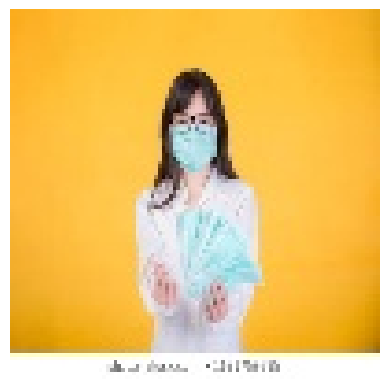

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_3645.jpg')
plt.axis(False)
plt.imshow(img)

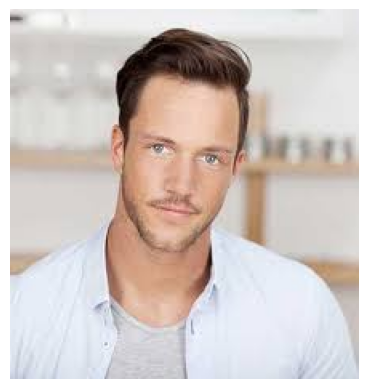

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2499.jpg')
plt.axis(False)
plt.imshow(img)

**Mask = 1**

**No_Mask = 0**

In [ ]:
mask_label = [1]*3725
no_mask_label = [0]*3828

In [ ]:
labels =mask_label + no_mask_label

In [ ]:
mask_loc = '/content/data/with_mask/'
no_mask_loc = '/content/data/without_mask/'
data = []
for img in mask:
  img_path = Image.open(mask_loc+img)
  img = img_path.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

for img in no_mask:
  img_path = Image.open(no_mask_loc+img)
  img = img_path.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
data = np.asarray(data)
labels = np.asarray(labels)

In [ ]:
data.shape,labels.shape

((7553, 128, 128, 3), (7553,))

In [ ]:
X = data
Y = labels

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,Y_train.shape, X_test.shape, Y_test.shape

((6042, 128, 128, 3), (6042,), (1511, 128, 128, 3), (1511,))

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.22352941, 0.21960784, 0.23921569],
         [0.23529412, 0.23137255, 0.25098039],
         [0.23921569, 0.23529412, 0.25490196],
         ...,
         [0.32941176, 0.3372549 , 0.35294118],
         [0.33333333, 0.3372549 , 0.35294118],
         [0.33333333, 0.3372549 , 0.35294118]],

        [[0.21960784, 0.21568627, 0.23529412],
         [0.22745098, 0.22352941, 0.24313725],
         [0.23529412, 0.23137255, 0.25098039],
         ...,
         [0.34117647, 0.34901961, 0.36470588],
         [0.3372549 , 0.34117647, 0.35686275],
         [0.31764706, 0.32156863, 0.3372549 ]],

        [[0.21568627, 0.21176471, 0.23137255],
         [0.22352941, 0.21960784, 0.23921569],
         [0.23137255, 0.22745098, 0.24705882],
         ...,
         [0.32941176, 0.3372549 , 0.35294118],
         [0.32156863, 0.3254902 , 0.34117647],
         [0.28235294, 0.28627451, 0.30196078]],

        ...,

        [[0.41960784, 0.2745098 , 0.21176471],
         [0.43137255, 0.28627451, 0.21960784]

In [ ]:
X_train_scaled.shape

(6042, 128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - acc: 0.7076 - loss: 0.6334 - val_acc: 0.8826 - val_loss: 0.2870
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8789 - loss: 0.2980 - val_acc: 0.9041 - val_loss: 0.2393
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9092 - loss: 0.2218 - val_acc: 0.9058 - val_loss: 0.2211
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9339 - loss: 0.1696 - val_acc: 0.9306 - val_loss: 0.2114
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9425 - loss: 0.1560 - val_acc: 0.9091 - val_loss: 0.2475


In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9281 - loss: 0.2484


In [ ]:
loss

0.2836974561214447

In [ ]:
accuracy

0.9139642715454102

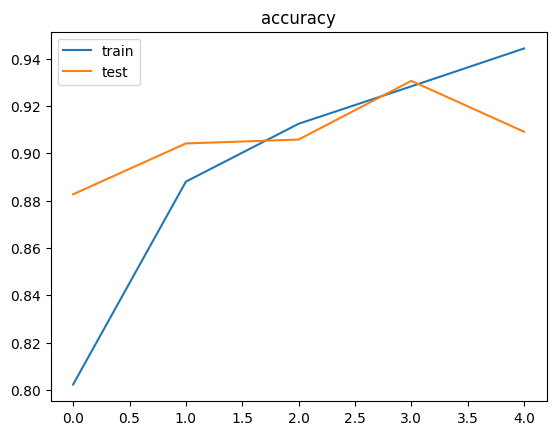

In [ ]:
plt.title('accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()

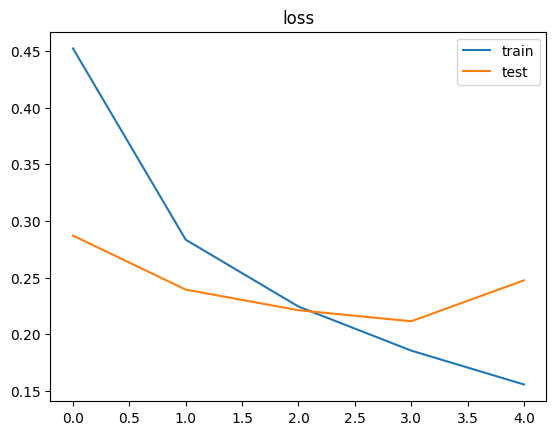

In [ ]:
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
import pickle
with open('Face_mask_detection.pkl','wb') as f:
  pickle.dump(model,f)

Path of the image to be predicted: /content/ml_mask.jpg


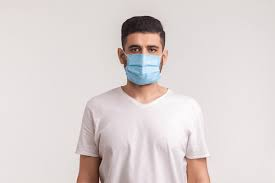

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
[[0.47324568 0.5003818 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')